In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy import stats


In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [4]:
dups = df.duplicated()
print('is there duplicates? : ', dups.any()) 

is there duplicates? :  True


In [5]:
df.drop_duplicates(inplace=True)

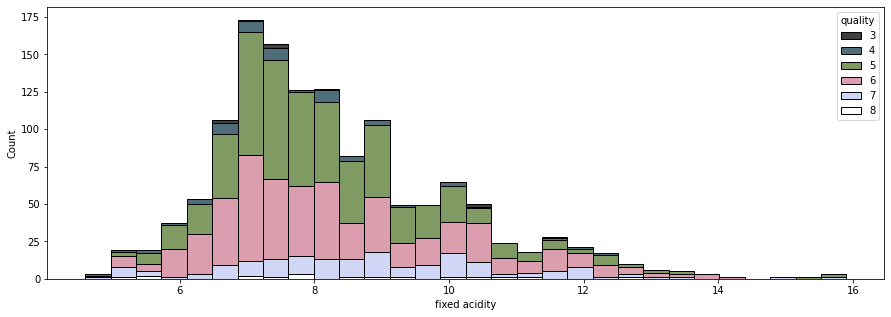

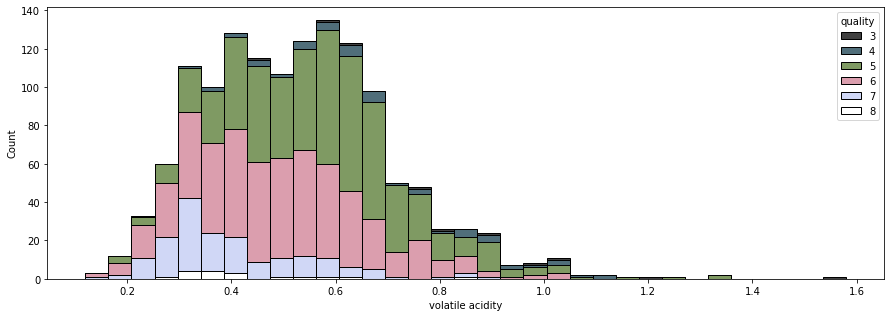

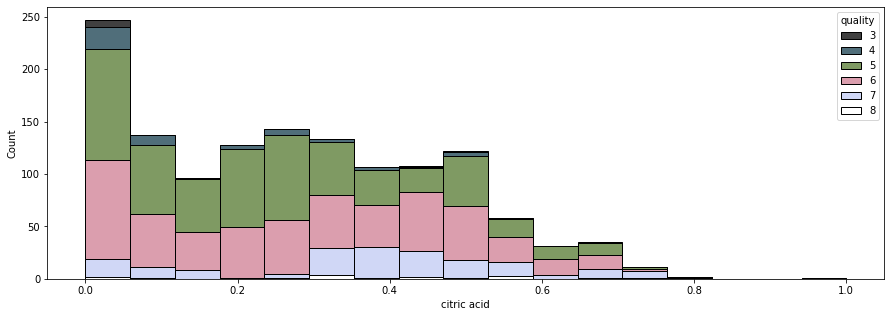

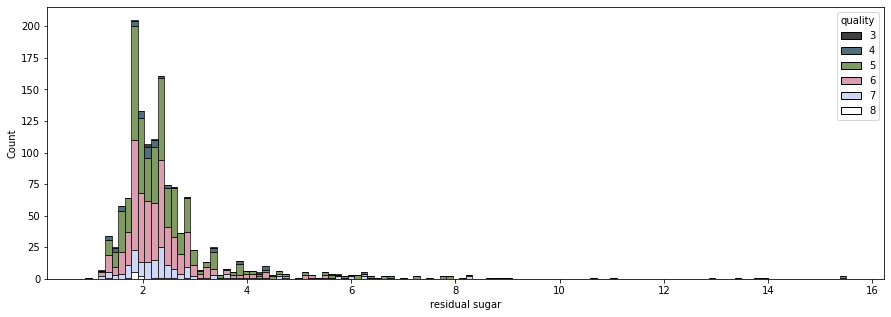

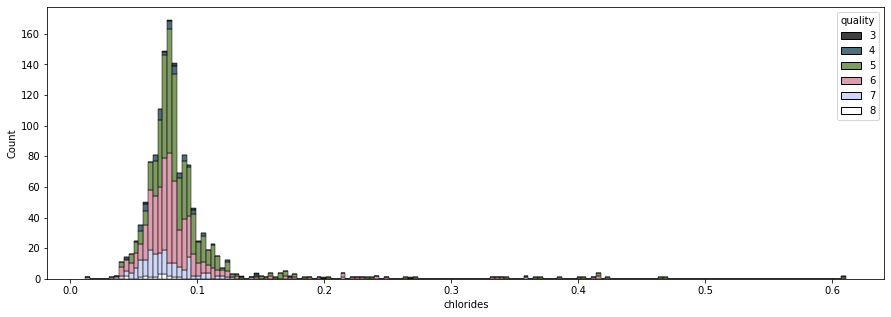

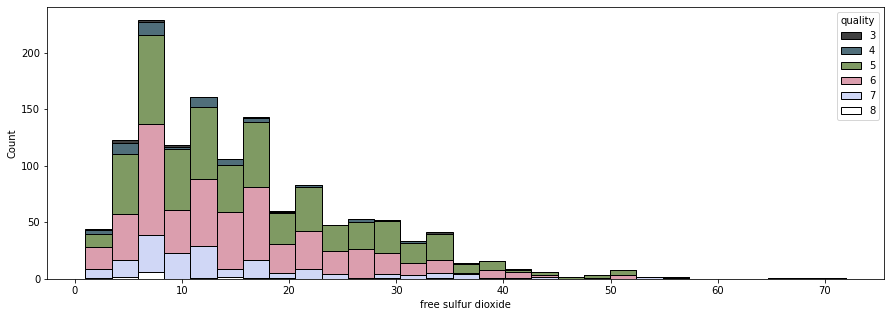

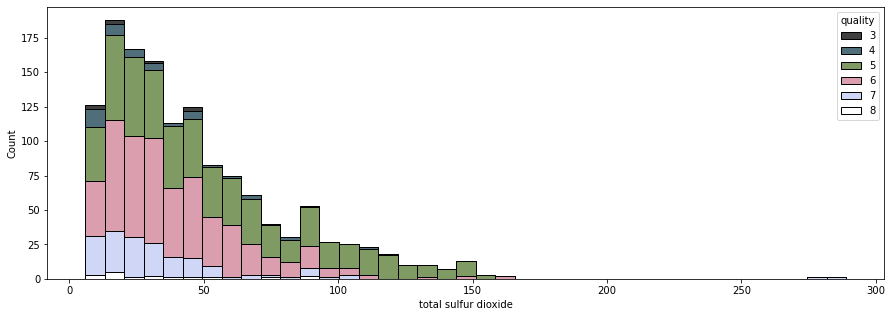

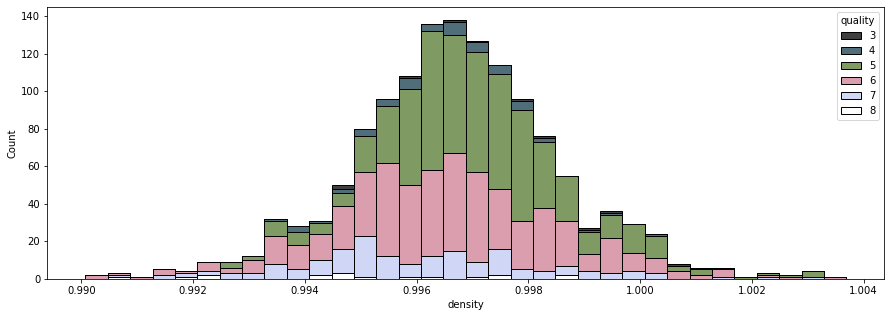

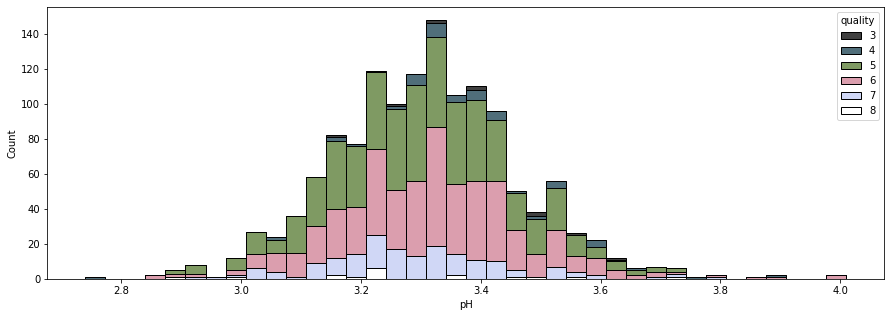

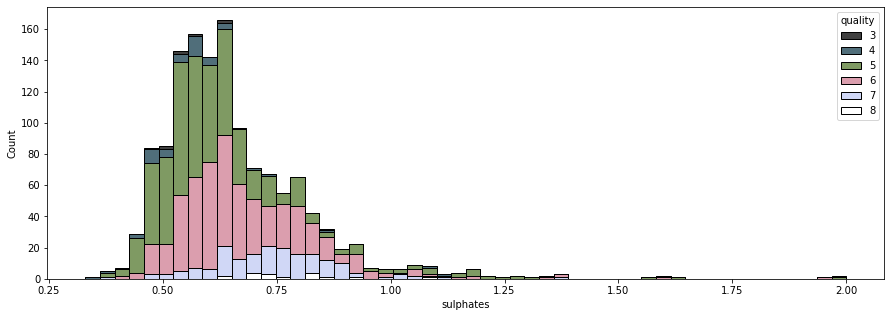

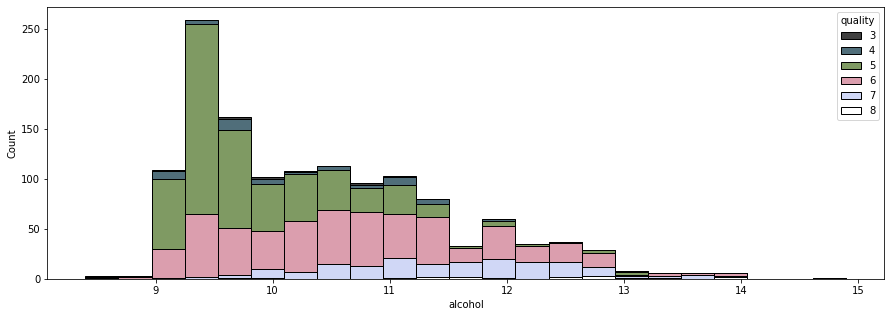

In [6]:
sns.color_palette("cubehelix", as_cmap=True)
for column in df.columns:
    if column == 'quality':
        continue
    fig, ax = plt.subplots(figsize=(15,5))
    ax = sns.histplot(data=df,
                      x=column, 
                      hue='quality', 
                      palette=sns.color_palette("cubehelix", as_cmap=True), 
                      multiple='stack')

original shape:  (1359, 12)
normalize shape: 1 1239
normalize shape: 2 1127
normalize shape: 3 1075
normalize shape: 4 1048
normalize shape: 5 1035
normalize shape: 6 1034
normalize shape: 7 1034
normalize shape: 8 1034
normalize shape: 9 1034


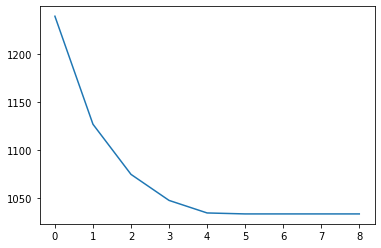

In [7]:
print('original shape: ', df.shape)
normalize_df = df
normalize_size = []
for i in range(1,10):
    normalize_df = normalize_df[(np.abs(stats.zscore(normalize_df.drop(columns='quality'))) < 3).all(axis=1)]
    print('normalize shape:', i, normalize_df.shape[0])
    normalize_size.append(normalize_df.shape[0])

plt.plot(normalize_size)

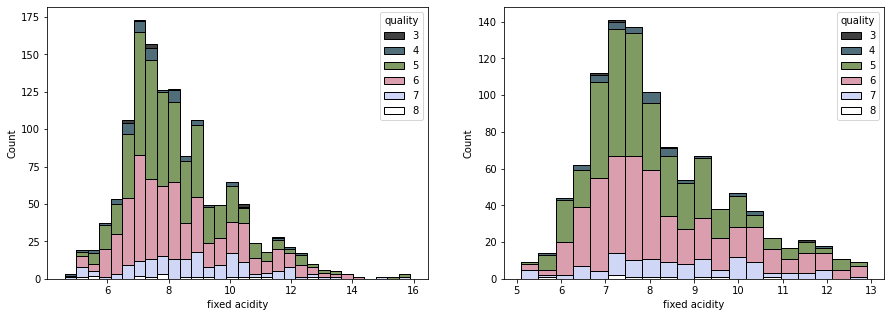

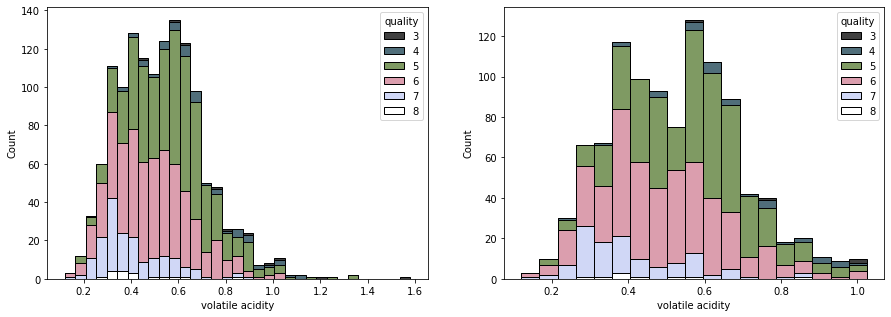

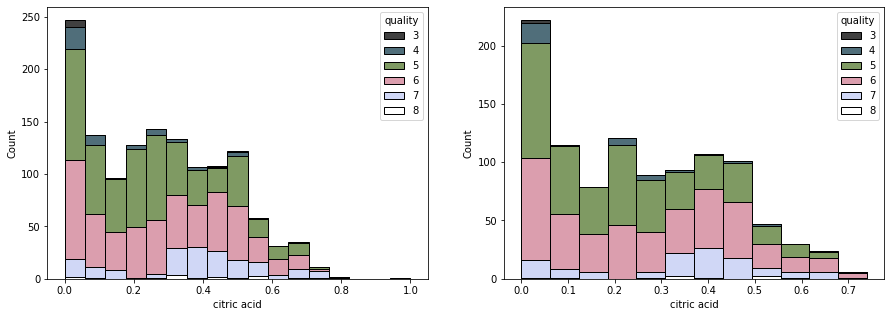

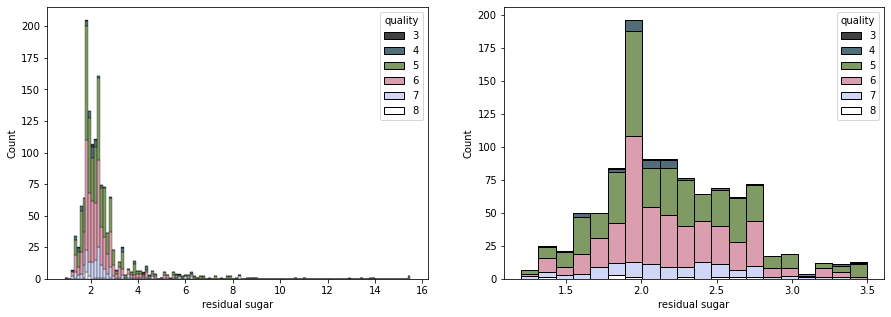

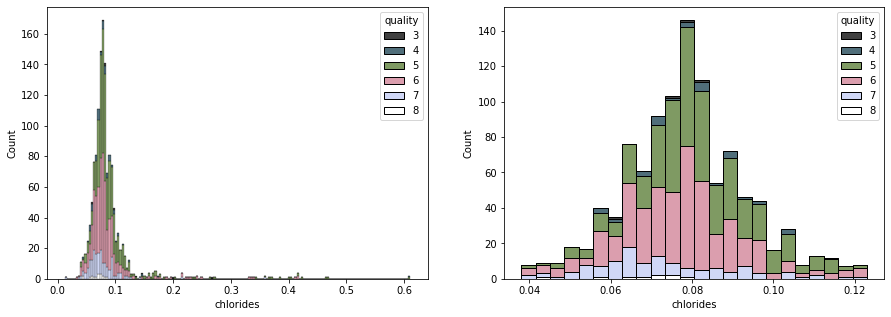

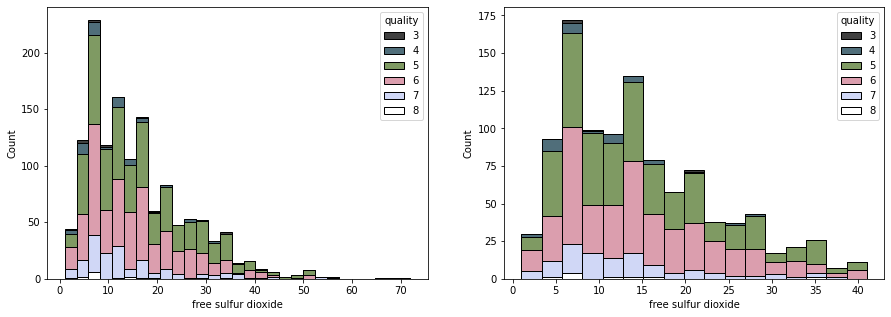

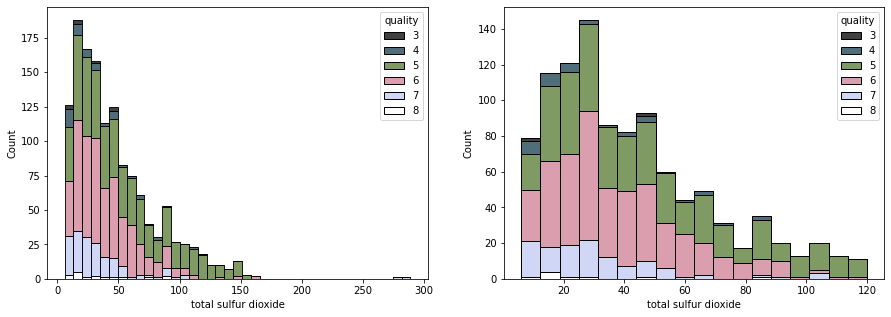

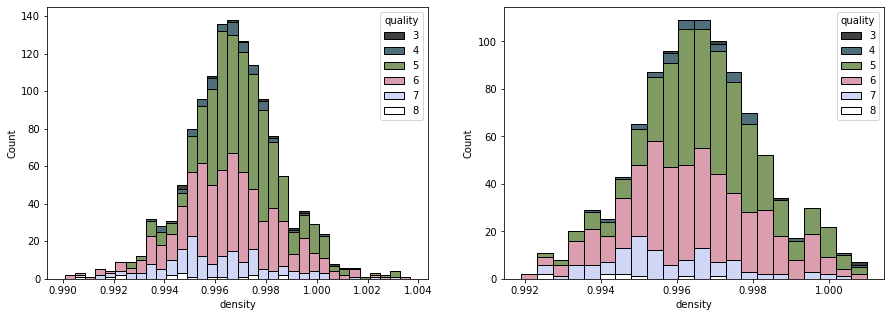

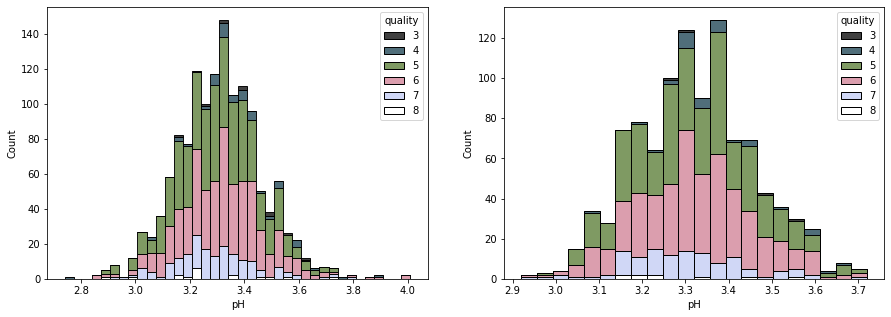

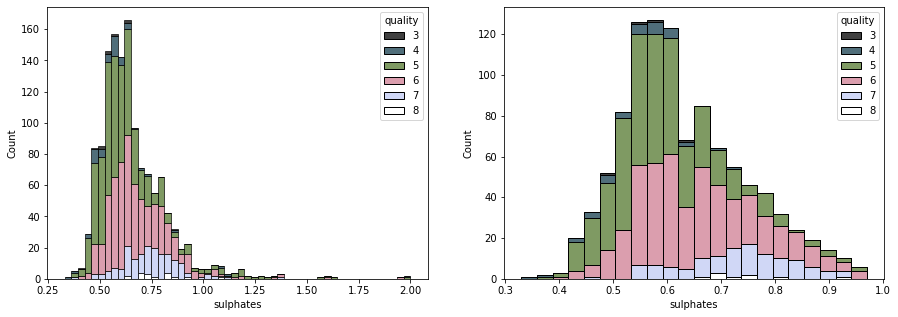

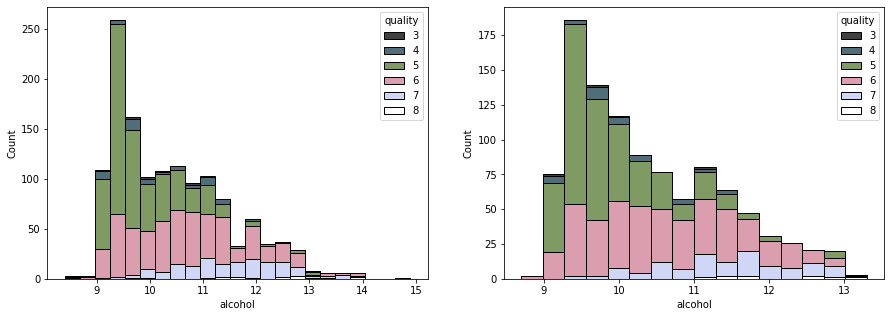

In [8]:
sns.color_palette("cubehelix", as_cmap=True)
for column in df.columns:
    if column == 'quality':
        continue
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    sns.histplot(data=df,
                    x=column, 
                    hue='quality', 
                    palette=sns.color_palette("cubehelix", as_cmap=True), 
                    multiple='stack', 
                    ax = ax[0])
    
    sns.histplot(data=normalize_df,
                    x=column, 
                    hue='quality', 
                    palette=sns.color_palette("cubehelix", as_cmap=True), 
                    multiple='stack', 
                    ax = ax[1])

In [11]:
def elbow_method(df, k_range):
    Sum_of_squared_distances = []
    for k in k_range:
        model = KMeans(n_clusters=k)
        model = model.fit(df)
        Sum_of_squared_distances.append(model.inertia_)

    plt.plot(k_range, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

C:\Users\1 lagi\.conda\envs\data_science\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


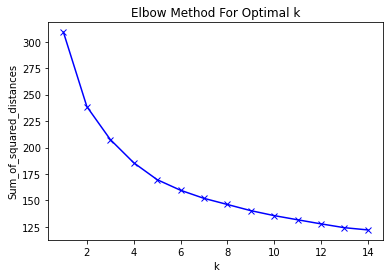

In [12]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
elbow_method(df_scaled, range(1,15))

C:\Users\1 lagi\.conda\envs\data_science\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


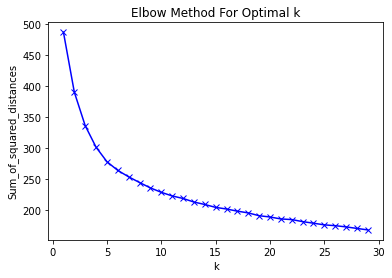

In [19]:
normalize_df_scaled = pd.DataFrame(scaler.fit_transform(normalize_df), columns=normalize_df.columns)
elbow_method(normalize_df_scaled, range(1,30))

C:\Users\1 lagi\.conda\envs\data_science\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


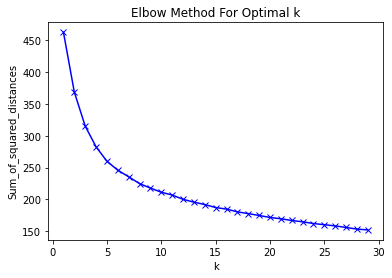

In [22]:
no_qa = normalize_df.drop(columns=['quality'])
no_qa_scaled = pd.DataFrame(scaler.fit_transform(no_qa), columns=no_qa.columns)
elbow_method(no_qa_scaled, range(1,30))

In [30]:
model = KMeans(n_clusters=5)
model = model.fit(no_qa_scaled)
no_qa['result'] = model.labels_

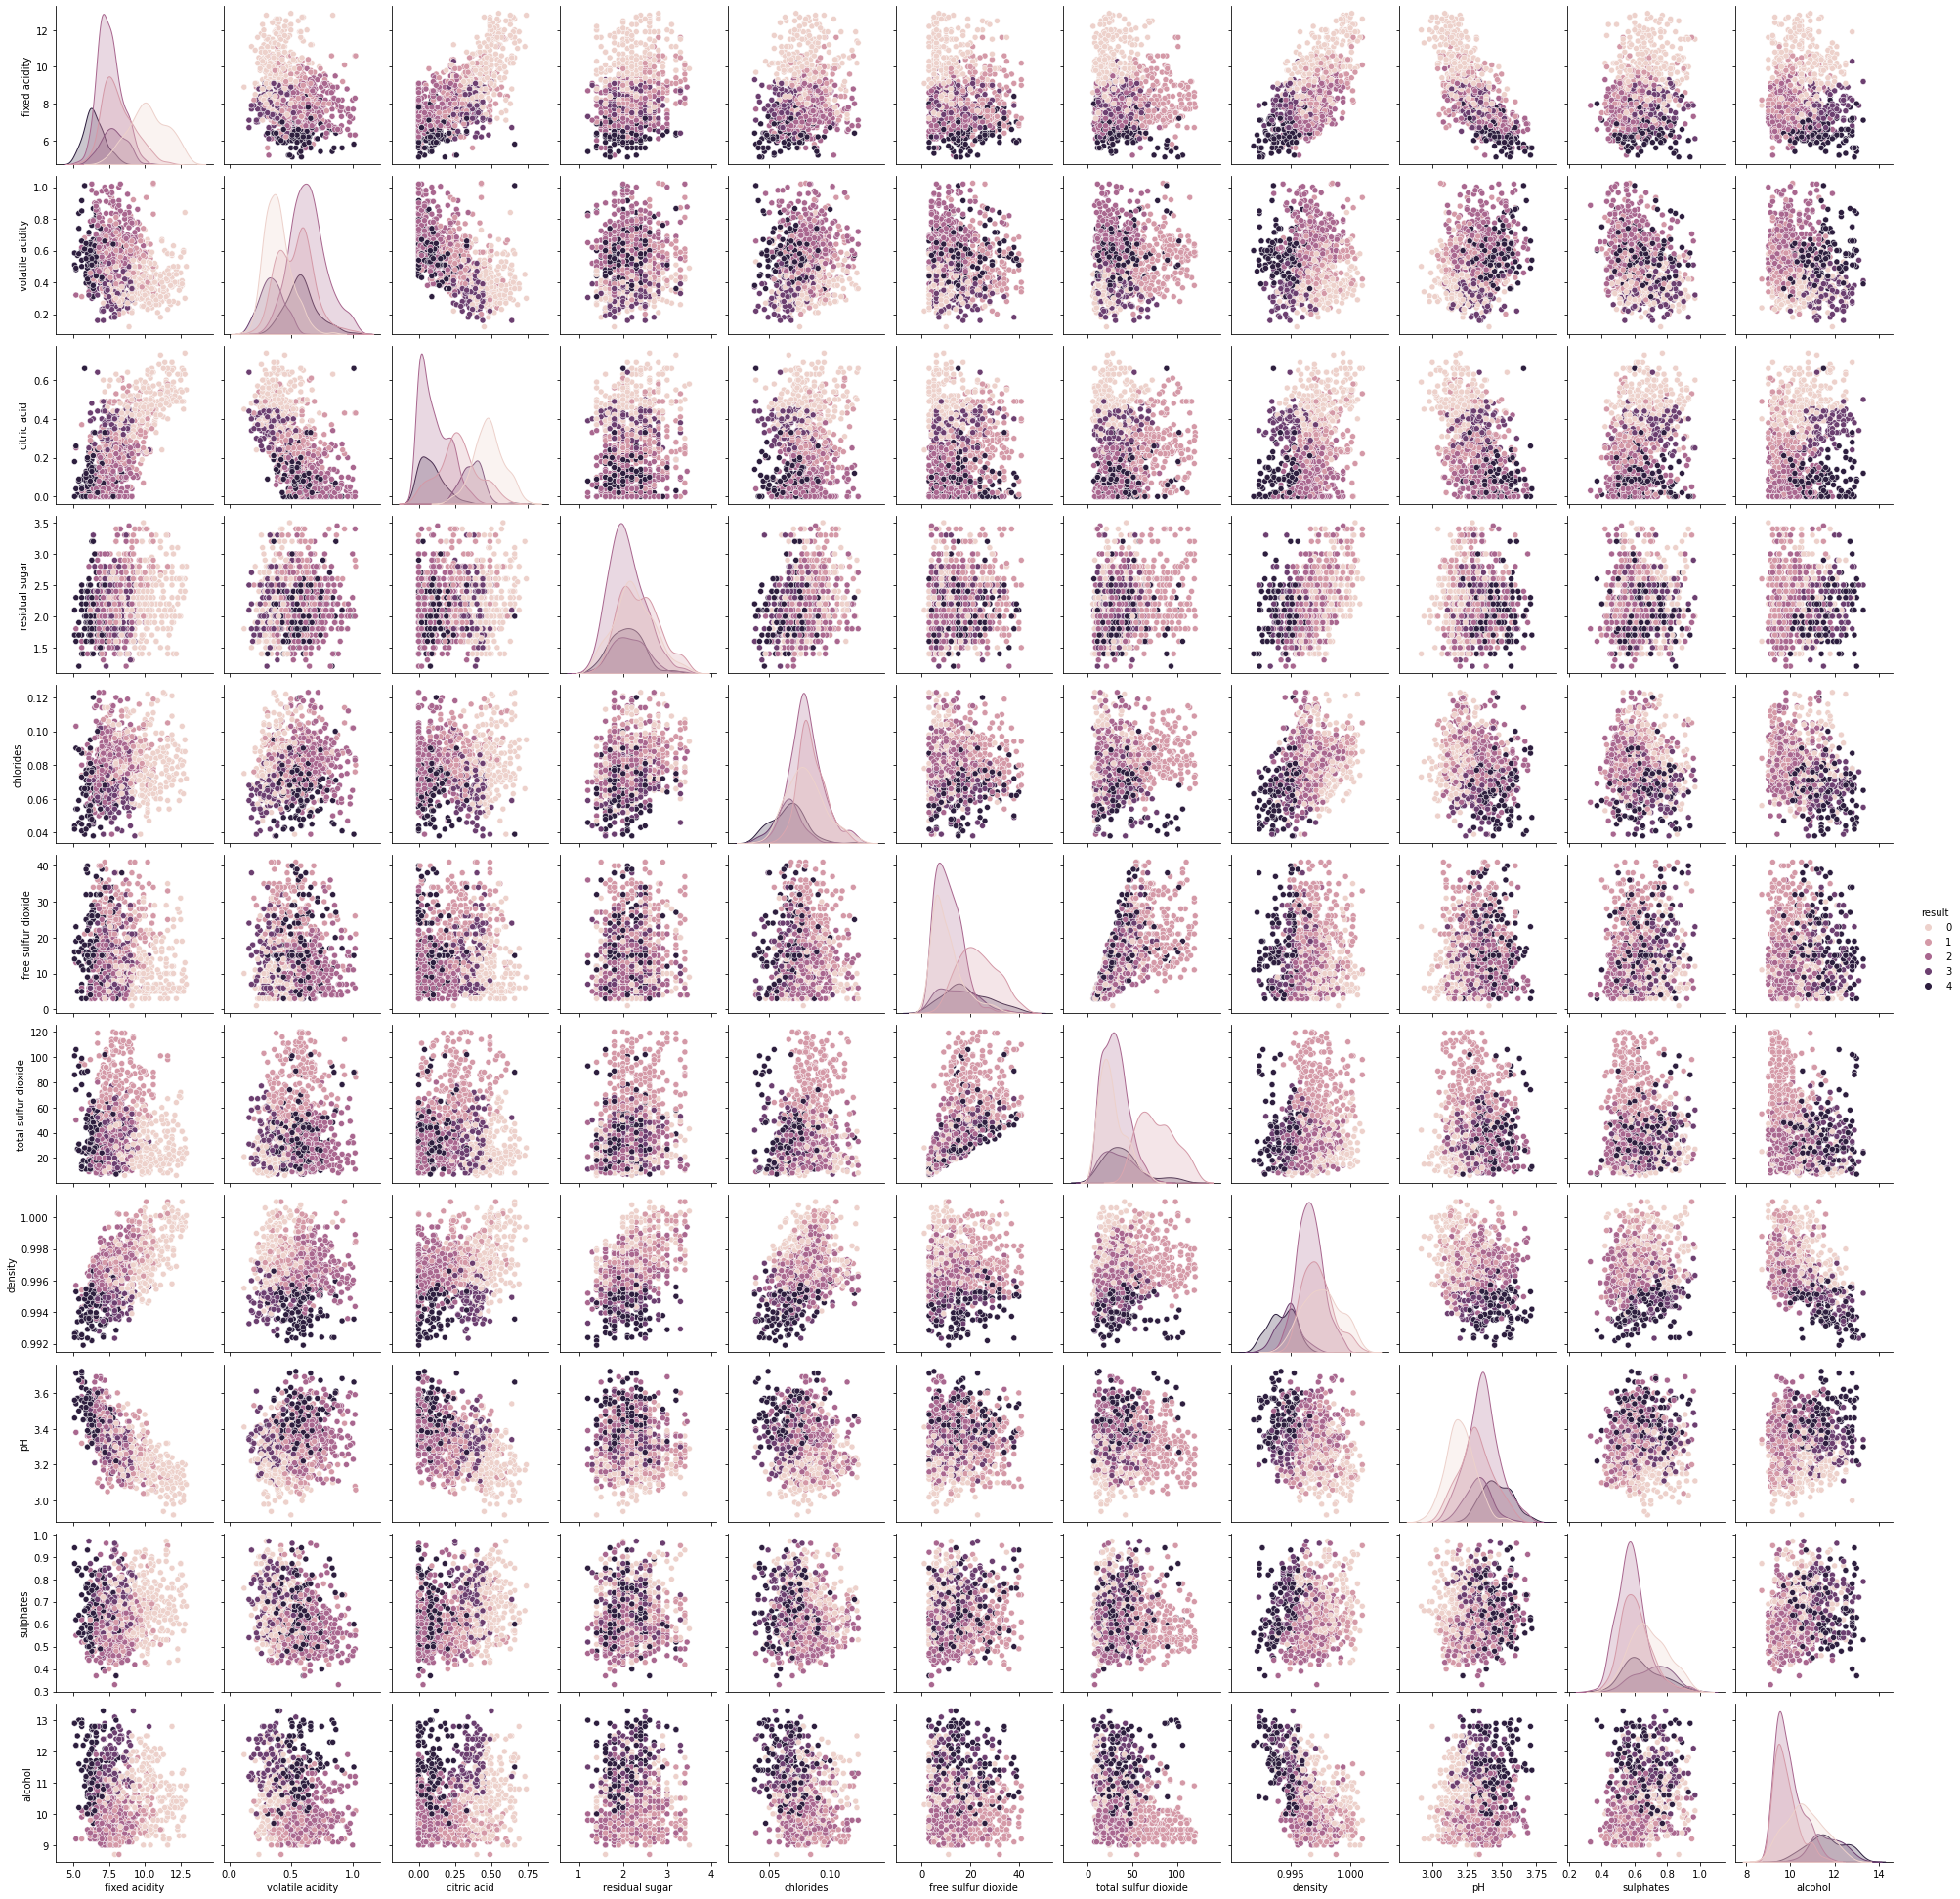

In [31]:
sns.pairplot(no_qa, hue='result')